In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the netflix_titles.csv file as a DataFrame
netflix_df = pd.read_csv("Resources/clean_netflix.csv", encoding="utf-8")
netflix_df

,Movie/TV Show,Title,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,...,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",December 23,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",December 20,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November 16,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",January 11,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7261,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",October 19,2020,...,United Kingdom,Denmark,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7262,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",March 2,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7263,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",October 31,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# How many movies and tv shows have multiple countries involved?

In [3]:
# Get country count for each row
netflix_df["country_count"] = netflix_df["Country of Production"].str.split(", ").apply(lambda x: len(x))
netflix_df.head(20)

,Movie/TV Show,Title,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,...,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12,country_count
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",December 23,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",December 20,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November 16,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",July 1,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies",June 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,November 1,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,Movie,706,India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies",April 1,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,Movie,1920,India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",December 15,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
# Determine value counts of the number of countries involved
netflix_df["country_count"].value_counts().sort_values(ascending=False)

1     6115
2      760
3      240
4       96
5       32
6       14
7        5
8        1
12       1
10       1
Name: country_count, dtype: int64

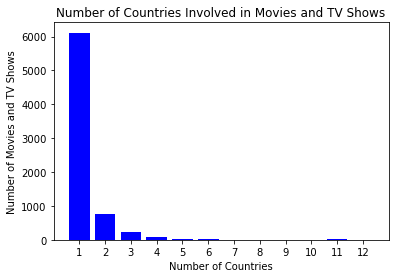

In [5]:
# Create bar graph
country_count = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
movies_shows = [6115, 760, 240, 96, 32, 14, 5, 1, 0, 1, 9, 1]
x_axis = np.arange(len(movies_shows))
plt.bar(x_axis, movies_shows, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, country_count)
plt.title("Number of Countries Involved in Movies and TV Shows")
plt.xlabel("Number of Countries")
plt.ylabel("Number of Movies and TV Shows")
plt.show()

In [6]:
#netflix_df["country_count"].plot(kind = "bar", figsize = (16,8))
#plt.title("Number of Movies and TV Shows with Multiple Countries Involved")
#plt.xlabel("Countries")
#plt.ylabel("Number of Movies and TV Shows")
#plt.show()

# Which country produced the most movies and tv shows?

In [7]:
# Determine the top 25 countries
countrycount = netflix_df["Country of Production"].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
top_25 = countrycount.head(25)
top_25

United States     3287
India              990
United Kingdom     721
Canada             412
France             349
Japan              285
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          142
Egypt              110
Turkey             108
Hong Kong          102
Italy               89
Brazil              88
Belgium             85
Taiwan              85
Argentina           82
Indonesia           80
Philippines         78
Nigeria             76
Thailand            65
South Africa        54
dtype: int64

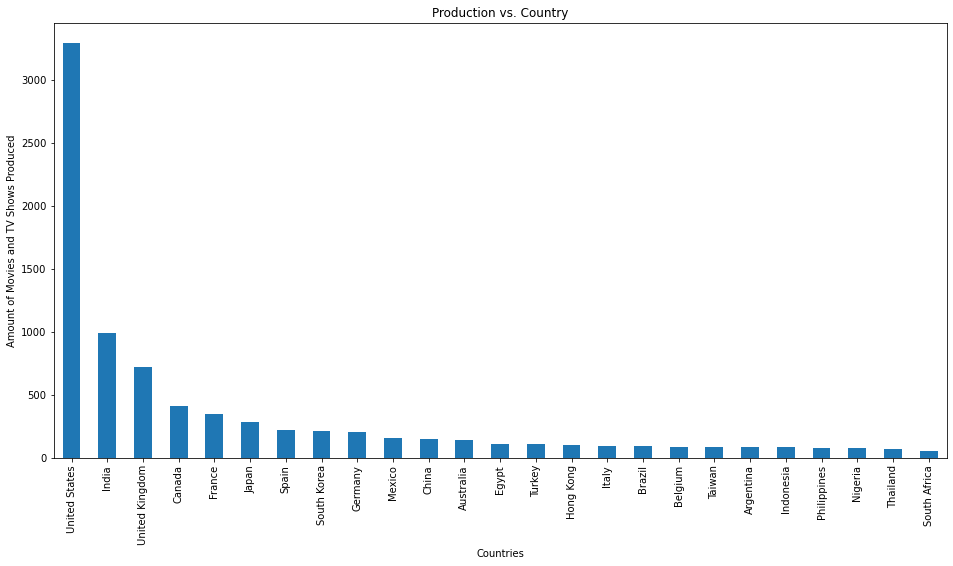

In [8]:
# Create bar chart
top_25.plot(kind = "bar", figsize = (16,8))
plt.title("Production vs. Country")
plt.xlabel("Countries")
plt.ylabel("Amount of Movies and TV Shows Produced")
plt.show()

# Comparison of US and rest of the world movie and tv show production

Use the above results for this question.

# Country of origin vs. when it was added to netflix ***

In [9]:
movies = netflix_df.loc[netflix_df["Movie/TV Show"] == "Movie"]
movies

,Movie/TV Show,Title,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,...,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12,country_count
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",December 23,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",December 20,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November 16,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies",June 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,Movie,Zoo,India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",July 1,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7260,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",January 11,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7261,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",October 19,2020,...,Denmark,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7262,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",March 2,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


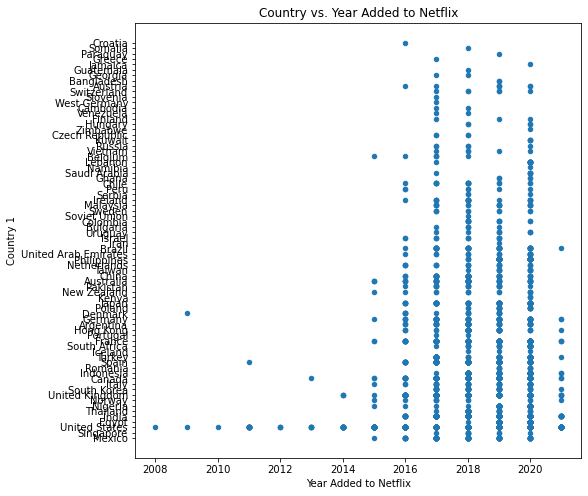

In [10]:
movies.plot(kind="scatter", x="Year Added to Netflix", y="Country 1", figsize=(8,8),
                   title="Country vs. Year Added to Netflix")
plt.show()

In [11]:
countries = netflix_df["Country 1"]
countries.head(40)

0             Brazil
1             Mexico
2          Singapore
3      United States
4      United States
5             Turkey
6              Egypt
7      United States
8              India
9              India
10     United States
11            Poland
12            Mexico
13          Thailand
14     United States
15           Nigeria
16            Norway
17             India
18    United Kingdom
19             India
20             India
21             India
22             India
23             Japan
24     United States
25     United States
26       South Korea
27             Italy
28     United States
29            Canada
30         Indonesia
31         Indonesia
32     United States
33            Canada
34     United States
35           Romania
36           Romania
37             Spain
38            Turkey
39           Iceland
Name: Country 1, dtype: object

# Which genres were popular in 2020?

In [12]:
# Show data frame of movies and tv shows added in 2020
netflix_2020 = netflix_df.loc[netflix_df["Year Added to Netflix"] == 2020]
netflix_2020

,Movie/TV Show,Title,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,...,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12,country_count
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies",June 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
14,Movie,3022,United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",March 19,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23,TV Show,​SAINT SEIYA: Knights of the Zodiac,Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",January 23,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,TV Show,Zoids Wild,Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7260,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",January 11,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7261,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",October 19,2020,...,Denmark,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7263,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",October 31,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [13]:
# Comma separate "Genre"
Genre = netflix_2020.Genre.str.get_dummies(sep=', ').sum().sort_values(ascending=False)
top_40 = Genre.head(40)

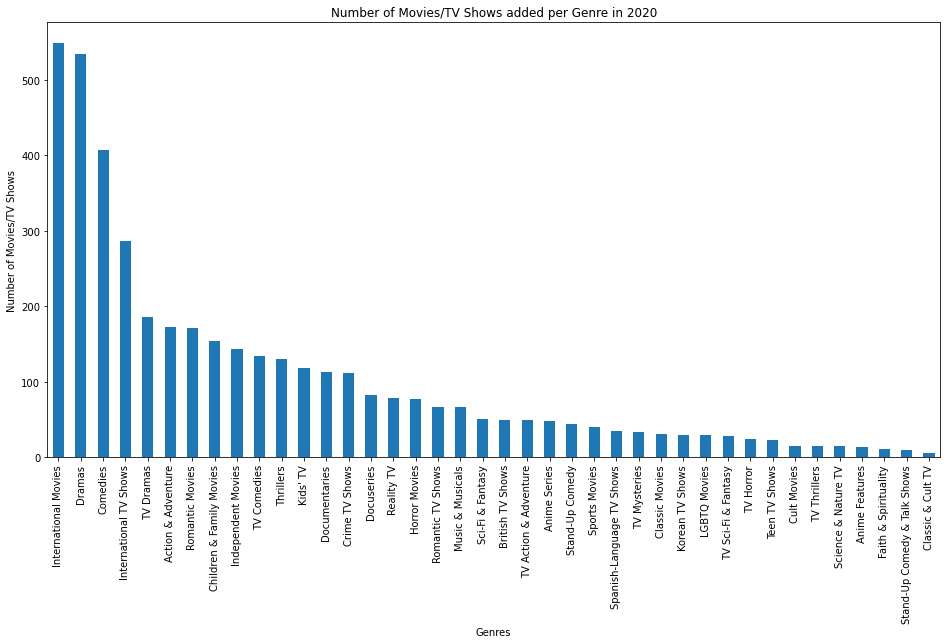

In [14]:
# Create bar chart
top_40.plot(kind = "bar", figsize = (16,8))
plt.title("Number of Movies/TV Shows added per Genre in 2020")
plt.xlabel("Genres")
plt.ylabel("Number of Movies/TV Shows")
plt.show()